# Knapsack Greedy Algorithms

Key idea: Pick solutions by picking items one at a time.

Examples for the knapsack problem:
- Pick items in order of value ascending
- Pick items in order of value descending
- Value density - dollars per kilogram

These types of algorithms of the advantages of being quick to design and impelement. They also tend to be fast. 
Conversely, their quality can vary wildly.

In general, consider starting greedy then go beyond.

# Modeling
How to formalize an optimization task as a mathematical model. This is a declarative formulation of the problem. 

1. First choose some decision variable to encode the results we are interested in. For the knapsack problem, we let $x_i$ denote whether item i is selected for the solution.
2. Express the problem constraints in terms of these variables to specify what the solutions to these problems are. For the knapsack problem, we cannot exceed the capacity of the knapsack: $$\sum_{i \in I} w_i x_i \le K$$
3. Express the objective function to specify the quality of each solution. For the knapsack problem, 
$$
\sum_{i \in I} v_i x_i
$$

Complete formulation of the knapsack problem


$$
\begin{align}
\text{maximize}   & \sum_{i \in I} v_i x_i \\
\text{subject to} & \sum_{i \in I} w_ix_i \le K\\
& x_i \in {0, 1}
\end{align}
$$

# Dynamic Programming

Let $O(k,j)$ denote the optimal solution for capacity $k$ and items $[1..j]$. 

$$
\begin{align}
\text{maximize}   & \sum_{i \in 1..j} v_i x_i \\
\text{subject to} & \sum_{i \in 1..J} w_ix_i \le K\\
& x_i \in {0, 1} \ (i \in 1..j)
\end{align}
$$

We are ultimately interested in $O(k, j)$ and will do so by looking at subproblems.

__Assume__: We know how to solve $O(k, j-1)$ for any value of $k$. We want to solve $O(k, j)$, just one more item.

Lets consider the new item. If $w_j \le k$, there are two cases:
1. Dont select item j, then the best solution we can obtain is: $O(k, j-1)$
2. We do select the item and we find a more optimal solution: $v_j + O(k - w_j, j-1)$

In summary, we have the following recurrance relation:
$$
\begin{align}
O(k, j) &= max(O(k, j-1),\ v_j + O(k - w_j, j-1))\ if\ w_j \le k \\
O(k, j) &= O(k, j-1)\ \quad otherwise \\
O(k, 0) &= 0 \quad \text{[base case]}
\end{align}
$$

We represent this programmatically below.

### Example 1


$$
\begin{align}
\text{maximize} \quad & 5x_1 + 4x_2 + 3x_3 \\
\text{subject to} \quad & 4x_1 + 5x_2 + 2x_3 \le 9
                        & x_i \in {0, 1} \ (i\ in 1..3)
\end{align}
$$

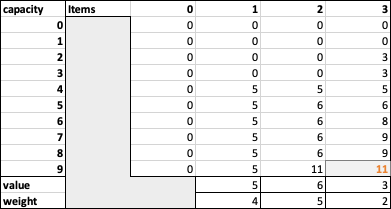

### Example 2

$$
\begin{align}
\text{maximize} \quad & 5x_1 + 6x_2 + 3x_3 \\
\text{subject to} \quad & 4x_1 + 5x_2 + 2x_3 \le 9
                        & x_i \in {0, 1} \ (i\ in 1..3)
\end{align}
$$

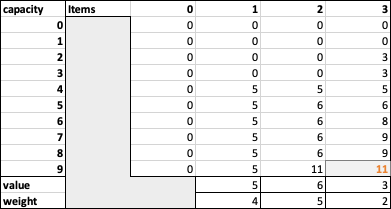

We can trace back the optimal solution like so. Look immediately to the left. If the value is same, the item was not selected.

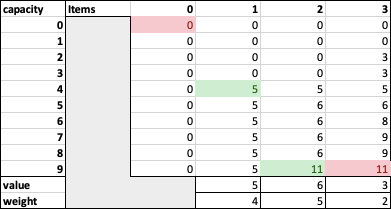

Therefore, we select item one and two.

### Example 3

$$
\begin{align}
\text{maximize} \quad & 16x_1 + 19x_2 + 23x_3 + 28x_4\\
\text{subject to} \quad & 2x_1 + 3x_2 + 4x_3 + 5x_4 \le 7
                        & x_i \in {0, 1} \ (i\ in 1..4)
\end{align}
$$

Solution:
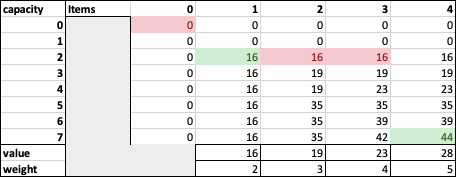

We select the first and fourth item.

### Complexity

We are looping through items and checking every possible capacity. Each check considers looking at a constant number of cells in the previous columns so that gets assumed away. Therefore, we are asymptotically $K * N$ where $K$ is the size of the knapsack and $N$ is then number of items.

This is known as pseudo-polynomial. Its efficient when $K$ is small.

# Relaxation, branch, and bound